# **SMS SPAM DETECTION**

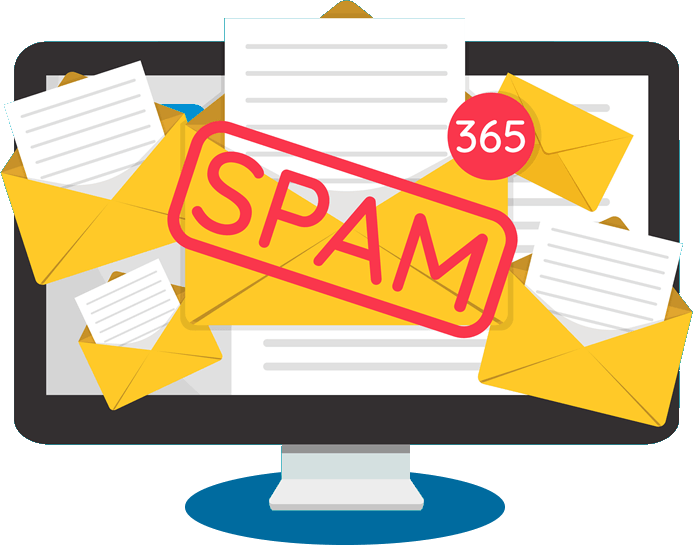

In [71]:
# importing required libraries andpackages

import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from collections import Counter
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,TfidfTransformer
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay,accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [72]:
# Loading the dataset

df=pd.read_csv('/content/drive/MyDrive/Codsoft Internship/ML/Spam SMS/spam.csv',encoding='latin1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [73]:
df.isna().sum()

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


In [74]:
df.dtypes

,0
v1,object
v2,object
Unnamed: 2,object
Unnamed: 3,object
Unnamed: 4,object


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [76]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [77]:
df.shape

(5572, 5)

In [78]:
# Drop the unnecessary columns

df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [79]:
# Rename columns

df=df.rename(columns={'v1':'target','v2':'text'})
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [80]:
df['target']=df['target'].map({'ham':0,'spam':1})
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [81]:
df['target'].value_counts()

,count
target,
0,4825
1,747


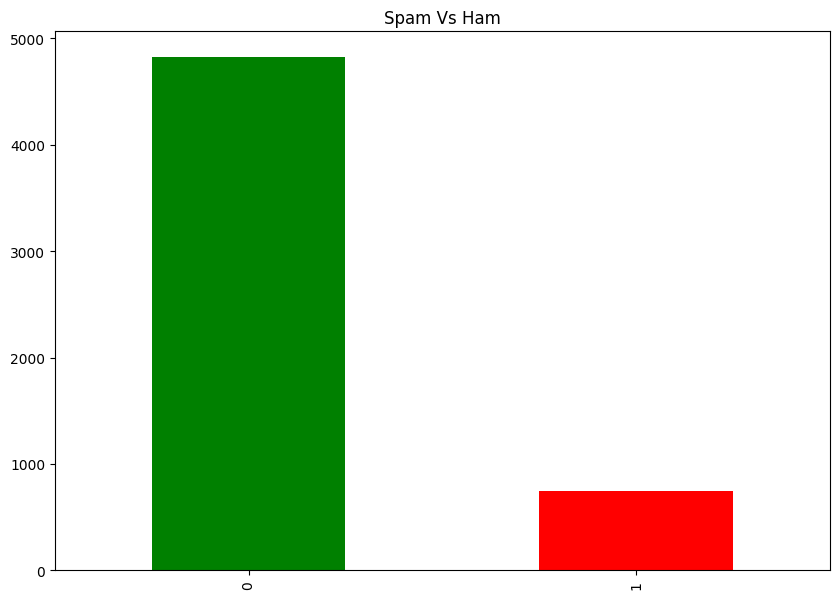

In [82]:
df.target.value_counts().plot(kind='bar', figsize=(10, 7),color=['green','red'])
plt.title('Spam Vs Ham')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [83]:
X = df.text
y = df.target

In [84]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object


In [85]:
print(y)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5572, dtype: int64


In [86]:
y=df['target']
y

,target
0,0
1,0
2,1
3,0
4,0
...,...
5567,1
5568,0
5569,0
5570,0


In [87]:
# Splitting the data into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [88]:
X.shape

(5572,)

In [89]:
X_train.shape,X_test.shape

((3900,), (1672,))

**Feature Extraction**


In [90]:
# Extracting the features using TF-IDF and fiting and transforming the data

tfidf = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [91]:
# Convert Y_train and Y_test to integer type
y_train = y_train.astype("int")
y_test = y_test.astype("int")

In [92]:
print(X_train)

708     To review and KEEP the fantastic Nokia N-Gage ...
4338                   Just got outta class gonna go gym.
5029    Is there coming friday is leave for pongal?do ...
4921    Hi Dear Call me its urgnt. I don't know whats ...
2592    My friend just got here and says he's upping h...
                              ...                        
3772    I came hostel. I m going to sleep. Plz call me...
5191                               Sorry, I'll call later
5226        Prabha..i'm soryda..realy..frm heart i'm sory
5390                           Nt joking seriously i told
860                   In work now. Going have in few min.
Name: text, Length: 3900, dtype: object


In [93]:
print(X_train_tfidf)


  (0, 6784)	0.2036674061100652
  (0, 5127)	0.16069009765718537
  (0, 832)	0.2942029533221057
  (0, 6425)	0.2299888748870684
  (0, 4294)	0.2942029533221057
  (0, 1730)	0.1830967933231891
  (0, 1701)	0.2942029533221057
  (0, 6835)	0.1703267398384584
  (0, 1687)	0.23571983525661494
  (0, 2013)	0.2942029533221057
  (0, 2795)	0.2274465254896455
  (0, 2788)	0.2942029533221057
  (0, 4325)	0.3863819557282538
  (0, 2533)	0.24260404766807295
  (0, 5179)	0.26276866734255794
  (1, 2988)	0.48547999128245667
  (1, 2895)	0.38594294491815584
  (1, 1661)	0.40369967264325335
  (1, 4507)	0.5411887811303221
  (1, 2914)	0.29947657175915554
  (1, 3510)	0.2642201388730181
  (2, 4689)	0.33702897982631685
  (2, 6786)	0.3126942228233435
  (2, 4293)	0.4056944099354124
  (2, 4758)	0.46869821034881815
  :	:
  (3894, 5333)	0.3355206697396443
  (3894, 4373)	0.34776563110407227
  (3895, 3201)	0.49796356031820593
  (3895, 3180)	0.444758353553002
  (3895, 4724)	0.377219004761111
  (3895, 1471)	0.3587277158940319
  (389

MultinomialNB()
Accuracy: 0.9677
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1453
           1       1.00      0.75      0.86       219

    accuracy                           0.97      1672
   macro avg       0.98      0.88      0.92      1672
weighted avg       0.97      0.97      0.97      1672



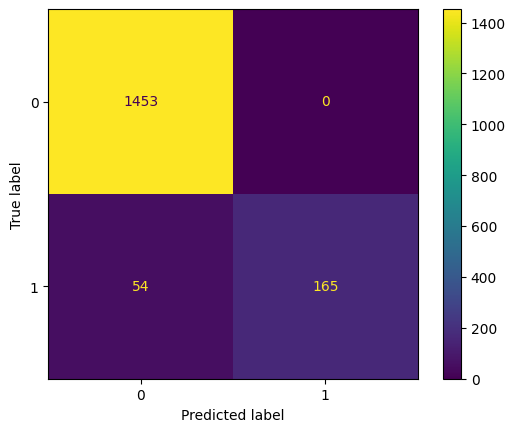

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
SVC()
Accuracy: 0.9779
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1453
           1       0.99      0.84      0.91       219

    accuracy                           0.98      1672
   macro avg       0.99      0.92      0.95      1672
weighted avg       0.98      0.98      0.98      1672



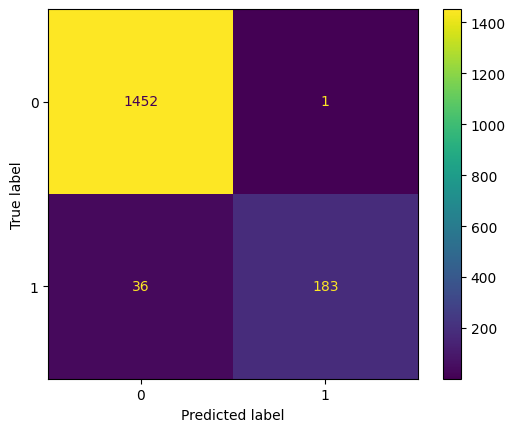

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
LogisticRegression(random_state=1)
Accuracy: 0.9528
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1453
           1       0.98      0.65      0.78       219

    accuracy                           0.95      1672
   macro avg       0.96      0.83      0.88      1672
weighted avg       0.95      0.95      0.95      1672



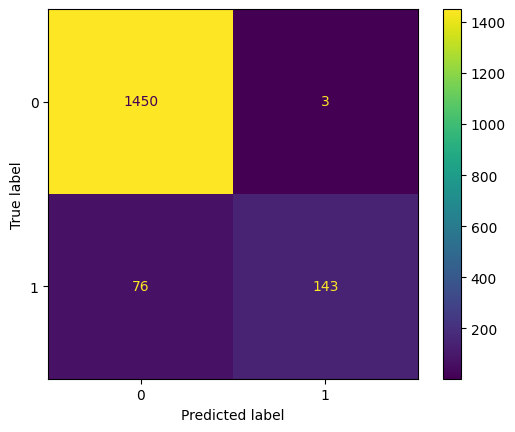

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
{'Model': 'MultinomialNB', 'Accuracy': 0.9677033492822966}
{'Model': 'SVC', 'Accuracy': 0.9778708133971292}
{'Model': 'LogisticRegression', 'Accuracy': 0.9527511961722488}


In [94]:
nb = MultinomialNB()
sv = SVC()
lr = LogisticRegression(random_state=1)

r = []
model = [nb, sv, lr]

for i in model:
    print(i)

    # Check if the model is GaussianNB, convert the input to dense if True
    if isinstance(i, GaussianNB):
        i.fit(X_train_tfidf.toarray(), y_train)
        y_pred = i.predict(X_test_tfidf.toarray())
    else:
        i.fit(X_train_tfidf, y_train)
        y_pred = i.predict(X_test_tfidf)

    r.append({"Model": i.__class__.__name__, "Accuracy": accuracy_score(y_test, y_pred)})
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.show()
    print("-" * 200)


for result in r:
    print(result)

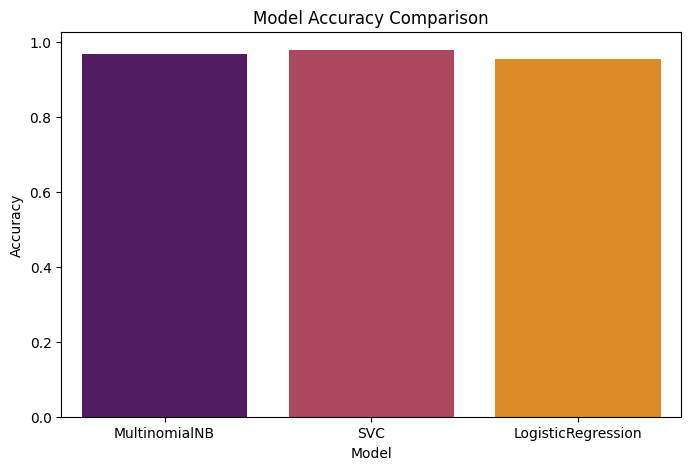

In [95]:
accuracy_df = pd.DataFrame(r)
palette = sns.color_palette("inferno", len(accuracy_df))
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette=palette)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

In [96]:
y_new=sv.predict(tfidf.transform(["Nah I don't think he goes to usf, he lives aro..."]))
result=y_new.item()
if result==0:
  print(" Ham SMS")

else:
    print("Spam SMS ")

 Ham SMS
